In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SVMSMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv')

df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
df_used = df[['est_diameter_min','est_diameter_max', 'relative_velocity','miss_distance','hazardous']]
df_used.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,False
1,0.265800,0.594347,73588.726663,6.143813e+07,True
2,0.722030,1.614507,114258.692129,4.979872e+07,False
3,0.096506,0.215794,24764.303138,2.543497e+07,False
4,0.255009,0.570217,42737.733765,4.627557e+07,True


In [5]:
X = df_used[['est_diameter_min','est_diameter_max', 'relative_velocity','miss_distance']]
y = df_used['hazardous']

<AxesSubplot:>

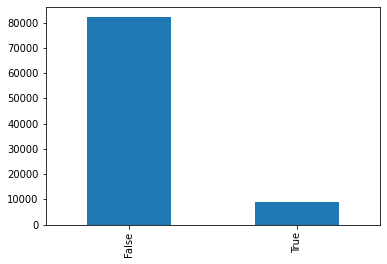

In [6]:
y.value_counts().plot(kind='bar')

In [7]:
smote = SVMSMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [8]:
scaler = StandardScaler()
scaler.fit(X_resampled)
X_resampled = scaler.transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [9]:
clf = DecisionTreeClassifier(random_state=0)

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [11]:
y_pred = clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred, average=None))
print("Recall:",recall_score(y_test, y_pred, average=None))
print("F1 Score:",f1_score(y_test, y_pred, average=None))

Accuracy: 0.9059117656026099
Precision: [0.90677914 0.90504866]
Recall: [0.90478805 0.90703487]
F1 Score: [0.9057825  0.90604068]


Decision Tree Accuracy: 0.9059117656026099
              precision    recall  f1-score   support

       False       0.91      0.90      0.91     16395
        True       0.91      0.91      0.91     16404

    accuracy                           0.91     32799
   macro avg       0.91      0.91      0.91     32799
weighted avg       0.91      0.91      0.91     32799



Text(0.5, 1.0, 'SVM Confusion Matrix')

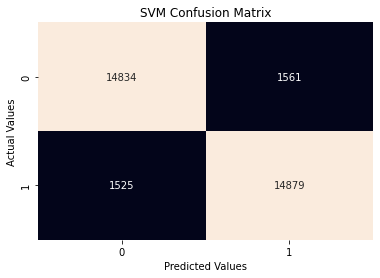

In [12]:
cm_mlp = confusion_matrix(y_test, y_pred)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVM Confusion Matrix')